# Index

- **[Introduction](#introduction)**: this will explain the project concept and motivation for the project (this can be based on your proposal). This must also state which project template you are using.  (max 1000 words)
- **[Literature Review](#literature-review)**: this is a revised version of the document that you submitted for your second peer review (max 2500 words)
- **[Design](#design)**: this is a revised version of the document that you submitted for your third peer review (max 2000 words)
- **[Feature Prototype](#feature-prototype)**: this is the only new element of the submission, details below (max 1500 words)

# Introduction

# Literature Review

I aim to explore the current understanding of machine learning model architectures and their performances, focusing on the key technology "Transformer". Moreover, in this project, I investigate the effectiveness of the Transformer and finally build a text summarization model.

## Transformer

Vaswani et al. (2017) proposed a new simple architecture, named Transformer, based on attention mechanisms without recurrence and convolutions. [1]

The architecture of the Transformer, which consists of both encoders and decoders, is introduced with a simple figure.

The paper indicates the algorithms and architecture of the Transformer with formulas, comparing the former architectures such as the recurrent neural network model and the gate recurrent unit model. How to reduce the amount of calculation for longer input sequences, which is one of the defects, is also introduced kindly. However, because of the nature of the paper, the concrete implementation is not shown on it. Instead, it provides a link to a GitHub repository, "tensor2tensor," [2] where some implementations with Python code are introduced.

Though these codes might still be beneficial, They have not been maintained for years. It is pretty uncertain whether it can run on the current Python environment.

Because the Transformer was initially developed for the machine translation task, various tasks except translation are not mentioned in this paper written in 2017. Thereby, the effectiveness of the Transformer is not investigated for a wide range of NLP tasks.

As mentioned at the beginning, hyperparameter tunings are obviously required to investigate effectiveness. The section "6.2 Model Variations" describes the parameters such as the number of heads, the parameters of the optimizer, and so on that exist in the Transformer model, and the same indicators will be used to compare the performance in this project. And the experiment environment, which the paper disclosed, is useful to the experiments in this project.

I have obtained the following beneficial knowledge, even though it is not directly related to my project.

- The number of heads is neither too many nor too few
- Interpretable models

There are not following items that are essential for this project in the paper.

- Sufficient benchmarks for various NLP tasks/applications
- Minimum viable and runnable code in the modern environment

## RetNet

Yutao et al. (2023) proposed the Retentive Network (RetNet), which is a strong successor to Transformer for large language models.[3]

One of the drawbacks of the Transformer, which is introduced in this paper, is the slow inference and inefficiency due to multi-head attention.
The performance comparison between the RetNet and the Transformer has been executed for large language models and represents the improvement. They are executed and compared for large language models and that difference might not be remarkable on smaller models such as text summarization tasks.

## Neural Text Summarization: A Critical Evaluation

Wojciech et al. (2019) introduced and evaluated the current shortcomings of text summarization.[4] Specifically, automatically connected datasets contain detrimental noises, the current evaluation protocols are weakly correlated with human judgment, and the models are overfitting.

## Text Summarization with Pretrained Encoders

Yang et al. (2019) indicated the effectiveness of the BERT, which is an abbreviation of Bidirectional Encoder Representations from Transformers, for text summarization, which is one of the NLP tasks. [5]
In this paper, the Transformer and its subspicies have advanced various NLP tasks and the effectiveness of pre-trained models has been investigated.

## Conclusion

In conclusion, the superiority and effectiveness of the Transformer have been shown, compared with the other architectures such as the recurrent neural network and convolutional neural network. Whereas performances, tunings, other NLP tasks, and architectures, which determine if encode or/and decode is used, have not been shown. And that is what I aim to do.

I have been changing my mind while reading papers. Since I can not prepare a large-scale computing environment in this project from the cost aspect, it might be better to investigate encoding and embedding text rather than researching advanced models such as RetNet. Because even if computationally efficient and effective models are researched in this project, there are no appropriate satisfying resources that are computationally costly to verify the effectiveness. So, it is preferable to research text representation for accuracy and performance, which are measurable in the current local environment, rather than applying and measuring computationally efficient models.

Moreover, the comparison between the pre-trained models and non-pre-trained models will also be one of the interesting topics. That will be the motivation to do the same comparison in this project.

### Citations

1. Vaswani et al. (2017). Attention Is All You Need.https://doi.org/10.48550/arXiv.1706.03762
2. tensorflow (n.d.). Tensor2tensor. Retrieved May 16, 2024, from https://github.com/tensorflow/tensor2tensor
3. Yutao et al. (2023). Retentive Network: A Successor to Transformer for Large Language Models. https://doi.org/10.48550/arXiv.2307.08621
4. Wojciech et al. (2019). Neural Text Summarization: A Critical Evaluation. https://doi.org/10.48550/arXiv.1908.08960
5. Yang et al. (2019). Text Summarization with Pretrained Encoders. https://doi.org/10.48550/arXiv.1908.08345

# Design

- Abstract
- Introduction
- Background
    - Technical description
- Experiments/Methodology
- Conclusion
- Future
- Reference

# Feature Prototype

Here are three types of machine learning tasks of the Transformer model.

1. Transformer classification task
2. Transformer text generation task
3. Transformer text summarization task

In the first classification task, it is indicated that the Transformer parts in the Keras and KerasNLP library actually work. The second text generation task shows how long a generative task takes time. It is essential to estimate the working time for a lot of experiments that are executed for performance comparisons. The third one is a minimum viable code for the text summarization task.

## Transformer classification task

Firstly, a Transformer classification model is built so that the local environment determines if it can run or not. This time, the KerasNLP library is used to add the encoder and decoder layers of the Transformer. The reasons why the KerasNLP library is utilized are as follows.

- Stability
- Parameters for experiments

The book "Deep Learning with Python, Second Edition" [10] introduces the simplified Transformer implementation that actually works in the local environment. However, it is not certain how widely it is used and it might not pass any testing. In addition, even though it is good for us to understand how the Transformer works internally because it is simplified, it is difficult for us to experiment with various parameters.

In [1]:
# Install KerasNLP
%pip install --upgrade keras-nlp

Note: you may need to restart the kernel to use updated packages.


In [2]:
import platform

import numpy as np
import matplotlib.pyplot as plt

import keras
import keras_nlp
import tensorflow as tf
import tensorflow_datasets as tfds

Using TensorFlow backend


In [3]:
def plot(history, title=None):
    """
    Display the plot that indicates the loss and accuracy.
    :param history: history object from the tensorflow fit function.
    :param title: title text.
    """
    flg, axes = plt.subplots(1, 2, tight_layout=True)
    if title is not None:
        flg.suptitle(t=title, fontsize=14)
    for i, key in enumerate(["loss", "accuracy"]):
        value = history.history[key]
        val_loss = history.history[f"val_{key}"]
        epochs = range(1, len(value) + 1)
        axes[i].plot(epochs, value, label=f"Training {key}")
        axes[i].plot(epochs, val_loss, label=f"Validation {key}")
        axes[i].set_title(f"Training and validation {key}")
        axes[i].set_xlabel("epochs")
        axes[i].set_ylabel(key)
        axes[i].legend()
    plt.show()

    print(
        np.min(history.history["val_loss"]),
        "The best number of epocs for the validation loss is",
        np.argmin(history.history["val_loss"]) + 1,
    )
    print(
        np.max(history.history["val_accuracy"]),
        "The best number of epocs for the validation accuracy is",
        np.argmax(history.history["val_accuracy"]) + 1,
    )

def load_ag_news_subset(batch_size, shuffle=False):
    """
    Load ag_news_subset dataset.
    :param batch_size: the number of batch size.
    :param shuffle: if True, it is shuffled.
    :return: a dataset object.
    """
    BUFFER_SIZE = 10000
    dataset, info = tfds.load(
        'ag_news_subset',
        with_info=True,
        as_supervised=False
    )
    train_dataset, test_dataset = dataset['train'], dataset['test']

    if shuffle:
        # If shuffle is hopefully used,
        # the reshuffle_each_iteration parameter must be False.
        # Or the partial training dataset and the validation set are contaminated.
        train_dataset = train_dataset.shuffle(
            buffer_size=BUFFER_SIZE,
            reshuffle_each_iteration=False
        )
        test_dataset = test_dataset.shuffle(
            buffer_size=BUFFER_SIZE,
            reshuffle_each_iteration=False
        )

    partial_train_dataset = train_dataset.take(len(train_dataset) // 10 * 8)
    val_dataset = train_dataset.skip(len(train_dataset) // 10 * 8)

    print("The number of training set is", len(train_dataset))
    print("The number of partial training set is", len(partial_train_dataset))
    print("The number of validation set is", len(val_dataset))

    # In advance, batch and prefetch are called. Or, they are needed for each use.
    train_dataset = train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    partial_train_dataset = partial_train_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
    test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

    return train_dataset, partial_train_dataset, val_dataset, test_dataset

def tuplize(x):
    """
    Transform a row from the dataset to learn.
    :param x: a single row of the dataset.
    :return: a tuple of the feature and the target.
    """
    return (
        x['title'] + ' ' + x['description'],# x: feature
        x['label']# y: target
    )

def build_text_vectorization_layer(
        dataset,
        max_tokens=25000,
        output_mode='int',
        sequence_length=50):
    """
    Build a TextVectorization layer for preprocessing of text/token.
    :param dataset: the tokenized text data.
    :param max_tokens: the number of token.
    :param output_mode: for the param of TextVectorization. multi_hot/int is expected.
    :return: a TextVectorization layer.
    """
    vectorization_layer = keras.layers.TextVectorization(
        max_tokens=max_tokens,
        output_mode=output_mode,
        output_sequence_length=sequence_length
    )
    vectorization_layer.adapt(dataset.map(lambda x: x['description'] + ' ' + x['title']))
    # The test set should not be adapted.
    #vectorization_layer.adapt(test_dataset.map(lambda x: x['description'] + ' ' + x['title']))
    return vectorization_layer

def build_model(
        vectorization_layer: keras.layers.TextVectorization,
        max_tokens=25000,
        embedding_dim=128,
        intermediate_dim=32,
        num_heads=4,
        sequence_length=50,
        name=None):
    if platform.system() == "Darwin" and platform.processor() == "arm":
        """
        Apple Silicon mac shows tht following warning.
        WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs,
        please use the legacy Keras optimizer instead,
        located at `tf.keras.optimizers.legacy.Adam`
        Therefore, keras.optimizers.legacy.Adam is used.
        """
        optimizer = keras.optimizers.legacy.Adam()
    else:
        optimizer = keras.optimizers.Adam()
    """
    Build a sequential model with the TextVectorization and Embedding.
    :param vectorization_layer: the layer object where sentence is converted to int.
    :param max_tokens: the number of token.
    :param embedding_dim: the number of dimension for embedding.
    :param intermediate_dim: the number of units.
    :param num_heads: the number of heads.
    :param sequence_length: the length of a sequence.
    :param name: the name of the model.
    :return: a sequential model.
    """
    inputs = keras.layers.Input(shape=(1,), dtype="string")
    x = vectorization_layer(inputs)
    x = keras_nlp.layers.TokenAndPositionEmbedding(
        vocabulary_size=max_tokens,
        sequence_length=sequence_length,
        embedding_dim=embedding_dim,
    )(x)
    x = keras_nlp.layers.TransformerEncoder(
        intermediate_dim=intermediate_dim,
        num_heads=num_heads
    )(inputs=x)
    x = keras.layers.GlobalMaxPooling1D()(x)
    x = keras.layers.Dropout(0.2)(x)
    outputs = keras.layers.Dense(4, activation="softmax")(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name=name)
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy'],
    )
    return model

2024-06-04 13:21:04.413739: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-06-04 13:21:04.413754: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-06-04 13:21:04.413757: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-06-04 13:21:04.413778: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-04 13:21:04.413792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-06-04 13:21:04.586898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


The number of training set is 120000
The number of partial training set is 96000
The number of validation set is 24000
Epoch 1/20
24/24 [==============================] - 58s 2s/step - loss: 1.3899 - accuracy: 0.4677 - val_loss: 0.5243 - val_accuracy: 0.8647
Epoch 2/20
24/24 [==============================] - 60s 2s/step - loss: 0.4536 - accuracy: 0.8477 - val_loss: 0.3173 - val_accuracy: 0.9000
Epoch 3/20
24/24 [==============================] - 59s 2s/step - loss: 0.2616 - accuracy: 0.9169 - val_loss: 0.2761 - val_accuracy: 0.9112
Epoch 4/20
24/24 [==============================] - 60s 3s/step - loss: 0.1795 - accuracy: 0.9459 - val_loss: 0.2637 - val_accuracy: 0.9140
Epoch 5/20
24/24 [==============================] - 60s 2s/step - loss: 0.1297 - accuracy: 0.9643 - val_loss: 0.2608 - val_accuracy: 0.9142
Epoch 6/20
24/24 [==============================] - 60s 2s/step - loss: 0.0960 - accuracy: 0.9768 - val_loss: 0.2628 - val_accuracy: 0.9144
Epoch 7/20
24/24 [=======================

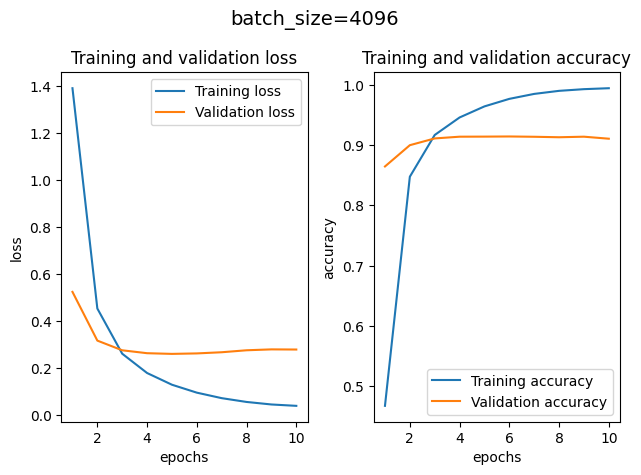

0.26082146167755127 The best number of epocs for the validation loss is 5
0.9144166707992554 The best number of epocs for the validation accuracy is 6


In [4]:
VOCAB_SIZE = 25000
BATCH_SIZE = 1024
NUM_HEADS = 4
INTERMEDIATE_DIM = 64
SEQ_LENGTH = 100

for batch_size in [4096]:
    train_dataset, partial_train_dataset, val_dataset, test_dataset = load_ag_news_subset(
        batch_size=batch_size
    )
    vectorization_layer = build_text_vectorization_layer(
        dataset=train_dataset,
        max_tokens=VOCAB_SIZE,
        output_mode='int',
        sequence_length=SEQ_LENGTH
    )
    model = build_model(
        vectorization_layer,
        max_tokens=VOCAB_SIZE,
        intermediate_dim=INTERMEDIATE_DIM,
        num_heads=NUM_HEADS,
        sequence_length=SEQ_LENGTH
    )
    history = model.fit(
        partial_train_dataset.map(tuplize, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False),
        validation_data=val_dataset.map(tuplize, num_parallel_calls=tf.data.AUTOTUNE, deterministic=False),
        epochs=20,
        batch_size=batch_size,
        verbose=1,
        callbacks =[
            keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
        ]
    )
    plot(history=history, title=f"batch_size={batch_size}")

- [10] Chollet, F. (2021). *Deep Learning with Python* (2nd ed., p. 246). Manning.


## Transformer text generation task

Now, it is tested that how long a text generation task takes so that the time for the text summarization task is estimated. The points of difference are mainly as follows.

- The number of units at the output layer.
- The number of layers and units at the hidden layers.
- The number of epochs

In the generative task, such as text summarization, these numbers generally get larger than the text classification model. As a result, it takes a significant amount of time for training. In this case, it took over 4 hours. That is one of the reasons why I have changed my plan, where the RetNet model is an optional topic. Even though the Retentive Network model will make the training 8.4 times faster in the aspect of the throughput, which is shown in the paper, the same Transformer model training must be executed for the comparison. The experiments will still take a lot of time, and that is not realistic.

If the investigation of the RetNet model is the main topic and consumes most of the time, notable differences may not be derived as a result of fewer training attempts. That devalues this report. Therefore, the RetNet model should be an optional topic to avoid that case, and other comparisons, such as text representations, should be preferred. That must make this report more beneficial.


In [5]:
import platform

import numpy as np

import tensorflow as tf
import keras
import keras_nlp

In [6]:
SEQUENCE_LENGTH = 50
MAX_TOKENS = 15000
EMBEDDING_DIM = 256
INTERMIDIATE_DIM = 2048
NUM_HEADS = 2
LEARNING_RATE = 2e-6 #  changed from 2e-5

In [7]:
dataset = keras.utils.text_dataset_from_directory(
    directory="aclImdb",
    label_mode=None,
    batch_size=256
)
dataset = dataset.map(
    lambda x: tf.strings.regex_replace(x, "<br />", " ")
)
dataset

Found 100006 files belonging to 1 classes.


<_MapDataset element_spec=TensorSpec(shape=(None,), dtype=tf.string, name=None)>

In [8]:
text_vectorization = keras.layers.TextVectorization(
    max_tokens=MAX_TOKENS,
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH,
)
text_vectorization.adapt(dataset)

In [9]:
def prepare_lm_dataset(text_batch):
    vectorized_sequences = text_vectorization(text_batch)
    x = vectorized_sequences[:, :-1]
    y = vectorized_sequences[:, 1:]
    return x, y

lm_dataset = dataset.map(prepare_lm_dataset, num_parallel_calls=4)

In [10]:
if platform.system() == "Darwin" and platform.processor() == "arm":
    """
    Apple Silicon mac shows tht following warning.
    WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs,
    please use the legacy Keras optimizer instead,
    located at `tf.keras.optimizers.legacy.Adam`
    Therefore, keras.optimizers.legacy.Adam is used.
    """
    optimizer = keras.optimizers.legacy.Adam(learning_rate=LEARNING_RATE)
else:
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
  
inputs = keras.Input(shape=(None,), dtype="int64")
x = keras_nlp.layers.TokenAndPositionEmbedding(
    vocabulary_size=MAX_TOKENS,
    sequence_length=SEQUENCE_LENGTH,
    embedding_dim=EMBEDDING_DIM,
)(inputs)
x = keras_nlp.layers.TransformerDecoder(
    intermediate_dim=INTERMIDIATE_DIM,
    num_heads=NUM_HEADS
)(x, x)
outputs = keras.layers.Dense(
    MAX_TOKENS,
    activation="softmax"
)(x)
model = keras.Model(inputs, outputs)
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 token_and_position_embeddi  (None, None, 256)            3852800   ['input_2[0][0]']             
 ng_1 (TokenAndPositionEmbe                                                                       
 dding)                                                                                           
                                                                                                  
 transformer_decoder (Trans  (None, None, 256)            1578752   ['token_and_position_embedding
 formerDecoder)                                                     _1[0][0]',              

In [11]:
tokens_index = dict(enumerate(text_vectorization.get_vocabulary()))

def sample_next(predictions, temperature=1.0):
    predictions = np.asarray(predictions).astype("float64")
    predictions = np.log(predictions) / temperature
    exp_preds = np.exp(predictions)
    predictions = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, predictions, 1)
    return np.argmax(probas)

class TextGenerator(keras.callbacks.Callback):
    def __init__(
            self,
            prompt,
            generate_length,
            model_input_length,
            temperatures=(1.,),
            print_freq=1):
        self.prompt = prompt
        self.generate_length = generate_length
        self.model_input_length = model_input_length
        self.temperatures = temperatures
        self.print_freq = print_freq
  
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.print_freq != 0:
            return
        for temperature in self.temperatures:
            sentence = self.prompt
            for i in range(self.generate_length):
                tokenized_sentence = text_vectorization([sentence])
                predictions = self.model(tokenized_sentence)
                next_token = sample_next(predictions[0, i, :])
                sampled_token = tokens_index[next_token]
                sentence += " " + sampled_token
            print(f"\nTemperature {temperature}: {sentence}")

prompt = "This movie" 
text_gen_callback = TextGenerator(
    prompt,
    generate_length=50,
    model_input_length=SEQUENCE_LENGTH,
    temperatures=(0., 0.2, 0.5, 0.7, 1., 1.5)
)

class EpochModelCheckpoint(tf.keras.callbacks.ModelCheckpoint):
    def __init__(
        self,
        filepath,
        frequency=1,
        monitor='val_loss',
        verbose=0,
        save_best_only=False,
        save_weights_only=False,
        mode='auto',
        options=None,
        **kwargs):
        super(EpochModelCheckpoint, self).__init__(
            filepath,
            monitor,
            verbose,
            save_best_only,
            save_weights_only,
            mode,
            "epoch",
            options
        )
        self.epochs_since_last_save = 0
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save % self.frequency == 0:
            self._save_model(epoch=epoch, batch=None, logs=logs)

    def on_train_batch_end(self, batch, logs=None):
        pass

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='example_transformer_next_word_prediction.keras',
    monitor='loss',
    mode='min',
    save_best_only=False,
)

In [12]:
model.fit(
    lm_dataset,
    epochs=200,
    callbacks=[
        model_checkpoint_callback,
        text_gen_callback,
    ]
)

Epoch 1/200
391/391 [==============================] - ETA: 0s - loss: 9.5333
Temperature 0.0: This movie soo gwyneth jail delivery lifeforce reader realization drawn samuel ingenious torturing sacred shelter upbringing brutality exception teaches dive automobiles write cab payne lodge flopped verve whom nukie always straighttovideo five cough nurses quits hustle chronicle belief developed virtually discovery slapstick resides disappears mentor thoroughly cynical sharp needlessly exhibits patricia phony

Temperature 0.2: This movie declare numb feed weaponry sneak passionate touches hellish greece critters affecting lumet kaye cloying aztec artifact win cigar heights misty returned ana net strike camille condition gorillas dreaded awkwardly frederick edges ad structure lengthy standup loving limo here etting 1940 insulted slaughtered elm amazingly birds cover contradictions amidst stricken polly

Temperature 0.5: This movie enjoyment very espionage dove risky hard blond need overlooked

## Transformer text summarization task

Finally, the text summarization task is below. Because the dataset contains only 2 entries, this model can fit 100%. This time, the encoder and decoder model of the Transformer is adopted. However, this is not a requirement of the text summarization model. It is not written that the decoder-only model of the Transformer can neither build the text summarization model nor achieve better performance. This will be an experiment in this report.

Moreover, there are various types of text representation/vectorization as follows, including pre-trained models.

- Static embeddings
    - word2vec
    - fastText (more advanced than word2vec)
    - GloVe
- Dynamic embeddings
    - BERT

This is an important experiment. Because, if there exists an ultimate representation to express words and text sequence, the neural network holds the ability to fit the hyper-dimensions. That is, finding better vector representation is essential to improve the performance.

Furthermore, there are many hyperparameters. Some of them are shown at the top of the following code.

### Embedding layer

This layer vectorizes words in a sequence. Similar words are vectorized closely.

- The number of vocabulary
- The number of embedding dimension
- Whether the value 0 is masked or not as padding

### PositionEmbedding layer

- The number of sequence length

### TransformerEncoder layer

This layer encodes text to the meaningful representation internally.

- The number of layers
- The number of hidden units
- The number of heads
- The dropout rate
- The epsilon value for normalization

### TransformerDecoder layer

This layer decodes the internally meaningful representation to the text.

- The number of layers
- The number of hidden units
- The number of heads
- The dropout rate
- The epsilon value for normalization

### Model

- The number of epochs
- The type of optimizer
- The learning rate of the optimizer

In [ ]:
import tensorflow as tf
import keras
import keras_nlp

EMBEDDING_DIM = 64
NUM_HEADS = 2
INTERMIDIATE_DIM = 256

dataset = [
    (
        "Giant pig fell into the swimming pool at his home in Ringwood, Hampshire. It took the efforts of a team of firefighters to winch him out of the water. A wayward horse also had to be rescued from a swimming pool in Sussex.",
        "<start> Giant pig fell into the swimming pool.",
        "Giant pig fell into the swimming pool. <end>",
    ),
    (
        "There are two chickens in the garden.",
        "<start> There are chickens.",
        "There are chickens. <end>",
    ),
]

# Preprocessing
input_texts, target_texts, decoder_target_text = zip(*dataset)

tokenizer = keras.preprocessing.text.Tokenizer(
    split=' ',
    filters='!"#$%&()*+,-./:;=?@[\\]^_`{|}~\t\n'
)
tokenizer.fit_on_texts(input_texts + target_texts + decoder_target_text)
vocabulary_size = len(tokenizer.word_index) + 1

input_sequences = tokenizer.texts_to_sequences(input_texts)
target_sequences = tokenizer.texts_to_sequences(target_texts)
decoder_target_sequences = tokenizer.texts_to_sequences(decoder_target_text)

max_input_length = max(len(sequence) for sequence in input_sequences)
max_target_length = max(len(sequence) for sequence in target_sequences)
max_decoder_target_length = max(len(sequence) for sequence in decoder_target_sequences)

input_sequences = keras.preprocessing.sequence.pad_sequences(
    input_sequences,
    maxlen=max_input_length,
    padding='post'
)
target_sequences = keras.preprocessing.sequence.pad_sequences(
    target_sequences,
    maxlen=max_target_length,
    padding='post'
)
decoder_target_sequences = keras.preprocessing.sequence.pad_sequences(
    decoder_target_sequences,
    maxlen=max_decoder_target_length,
    padding='post'
)
decoder_target_sequences = tf.expand_dims(decoder_target_sequences, axis=-1)

# Build model / Encoder & Decoder model
# The encoder encodes text and represents the feature vector.
# However, the decoder scheme contains this working, especially in its heads.
# That is, it is not certain whether the encoder is necessary for this task.
# There is value in the investigation.
encoder_inputs = keras.Input(
    shape=(max_input_length,),
    name="encoder_inputs"
)
encoder_embedding = keras_nlp.layers.TokenAndPositionEmbedding(
    vocabulary_size=vocabulary_size,
    sequence_length=max_input_length,
    embedding_dim=EMBEDDING_DIM,
)(encoder_inputs)
encoder_outputs = keras_nlp.layers.TransformerEncoder(
    num_heads=NUM_HEADS,
    intermediate_dim=INTERMIDIATE_DIM,
)(encoder_embedding)

decoder_inputs = keras.Input(
    shape=(max_target_length,),
    name="decoder_inputs"
)
decoder_embedding = keras_nlp.layers.TokenAndPositionEmbedding(
    vocabulary_size=vocabulary_size,
    sequence_length=max_target_length,
    embedding_dim=EMBEDDING_DIM,
)(decoder_inputs)
decoder_outputs = keras_nlp.layers.TransformerDecoder(
    num_heads=NUM_HEADS,
    intermediate_dim=INTERMIDIATE_DIM,
)(decoder_embedding, encoder_outputs)

outputs = keras.layers.Dense(
    vocabulary_size,
    activation="softmax"
)(decoder_outputs)

model = keras.Model(
    [encoder_inputs, decoder_inputs],
    outputs
)
# Note
# In the case that the dataset is large and the dimension is small,
# the learning rate of Adam needed to be smaller.
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Training
model.fit(
    [input_sequences, target_sequences],
    decoder_target_sequences,
    epochs=100,
)


In [ ]:
def summarize(text):
    """
    Summarize text
    :param text: original text
    :return: summarized text
    """
    input_sequence = tokenizer.texts_to_sequences([text])
    input_sequence = keras.preprocessing.sequence.pad_sequences(
        input_sequence,
        maxlen=max_input_length,
        padding='post'
    )
    idx = tokenizer.word_index['<start>']
    decoder_input_sequence = tf.constant(
        [[idx]],
        dtype=tf.int64
    )
    
    summary = []
    for _ in range(max_target_length):
        predictions = model.predict(
            [input_sequence, decoder_input_sequence],
            verbose=0
        )
        next_token = tf.argmax(predictions[0, -1, :])
        next_word = tokenizer.index_word.get(next_token.numpy(), '<unk>')
        if next_word == '<end>':
            break
        summary.append(next_word)
        decoder_input_sequence = tf.concat(
            [decoder_input_sequence, tf.expand_dims([next_token], axis=-1)],
            axis=-1
        )
    return ' '.join(summary)

# Sample
sample_text = "Giant pig fell into the swimming pool at his home in Ringwood, Hampshire. It took the efforts of a team of firefighters to winch him out of the water. A wayward horse also had to be rescued from a swimming pool in Sussex."
print("Original:", sample_text)
print("Summary:", summarize(sample_text))

sample_text = "There are two chickens in the garden."
print("Original:", sample_text)
print("Summary:", summarize(sample_text))

sample_text = "Two chickens fell into the swimming pool in the garden."
print("Original:", sample_text)
print("Summary:", summarize(sample_text))